## Date Time

 Shipment Date ve Order Date adlı iki kolon oluşturup bu oluşturulan koolonlardan Shipment Delay adlı yeni bir kolon oluşturma Date Time modülünü kullanarak

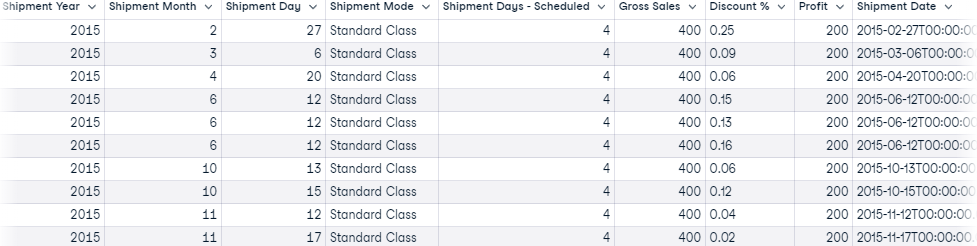

In [ ]:
data["Shipment Date"] = pd.to_datetime(data["Shipment Year"].astype(str) + "-" + data["Shipment Month"].astype(str) + "-" + data["Shipment Day"].astype(str))
data["Order Date"] = pd.to_datetime(data[" Order Year "].astype(str) + "-" + data[" Order Month "].astype(str) + "-" + data[" Order Day "].astype(str))
data["Shipment Delay"] = (data["Shipment Date"] - data["Order Date"]).dt.days - data[" Shipment Days - Scheduled "]
data
# rakamları str ile birleştirip en sonda çıkarma işlemi yapılıyor

## Reset İndex ve Sort_values

Customer Country gibi müşterilerin ülkelerinin bulunduğu kolonda ıd lere göre sınıflandırma yapılıp sıralanması

In [ ]:
# Group the data by customer country and count the number of unique customer IDs
country_counts = data.groupby('Customer Country')[' Customer ID '].nunique().reset_index(name='Total')

# Sort the data by the total number of customers in each country
country_counts = country_counts.sort_values(by='Total', ascending=False)

## Merge İşlemi

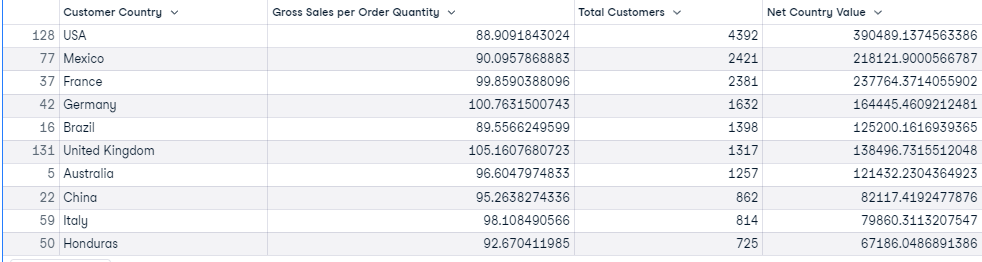

In [ ]:
df = df.merge(data.groupby('Customer Country')[' Customer ID '].size().reset_index(name='Total Customers'), on='Customer Country')

### Başka bir Merge Örneği

In [ ]:
average_gross_sales = data.groupby('Product Name')[' Gross Sales '].mean().reset_index()
total_gross_sales = data[' Gross Sales '].sum()
product_gross_sales = data.groupby('Product Name')[' Gross Sales '].sum().reset_index()
product_gross_sales['Sales Ratio'] = product_gross_sales[' Gross Sales '] / total_gross_sales

# Sort the dataframe in descending order by 'Sales Ratio'
product_gross_sales = product_gross_sales.sort_values(by='Sales Ratio', ascending=False)
inner_join1 = pd.merge(left=product_gross_sales, right=average_gross_sales, on='Product Name', how='right')

inner_join1['Net Değerr'] = inner_join1['Sales Ratio'] * inner_join1[' Gross Sales _y']
inner_join1


## Kolon İsmi Değiştirme (Rename)

In [ ]:
df_Country_totalgross_sales.rename(columns={' Gross Sales ': 'Total Gross Sales'}, inplace=True)
# Gross Sales olan kolon Total Gross Sales olarak değşitirldi

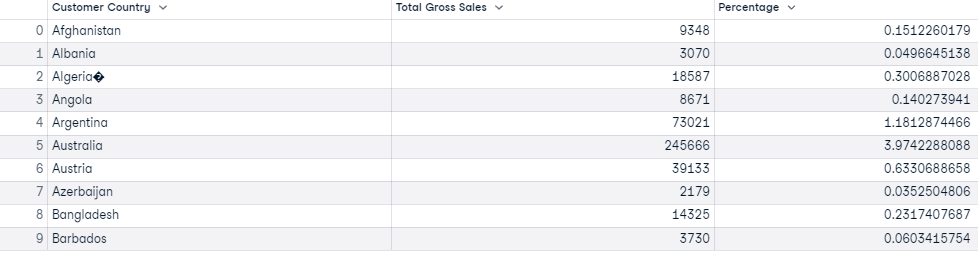

## Pie Chart

## Groupby, Sort_values, iloc ve concat

In [ ]:
## ilk olarak müşterileri ülkelerine göre gruplayıp gross sales değerlerini topluyoruz
Country_Total_Gross_Sales = data.groupby('Customer Country')[' Gross Sales '].sum()
# sonra değişkeni dataframe e çeviriyoruz
df_Country_totalgross_sales = pd.DataFrame(Country_Total_Gross_Sales)
## kolon ismi değiştiriyoruz
df_Country_totalgross_sales.rename(columns={' Gross Sales ': 'Total Gross Sales'}, inplace=True)
df_Country_totalgross_sales.reset_index(inplace=True)
# yüzde hesaplama
df_Country_totalgross_sales['Percentage'] = df_Country_totalgross_sales['Total Gross Sales'] / df_Country_totalgross_sales['Total Gross Sales'].sum() * 100
df_Country_totalgross_sales


In [ ]:
import matplotlib.pyplot as plt

# Sort the dataframe by Percentage in descending order
df_Country_totalgross_sales_sorted = df_Country_totalgross_sales.sort_values(by='Percentage', ascending=False)

# Get the top 10 countries with highest Percentage
top_10_countries = df_Country_totalgross_sales_sorted.head(10)

# Get the sum of Percentage for the remaining countries
other_countries_percentage = df_Country_totalgross_sales_sorted.iloc[10:]['Percentage'].sum()

# Create a new dataframe for the top 10 countries and the other countries
plot_data = pd.concat([top_10_countries, pd.DataFrame({'Customer Country': ['Other'], 'Percentage': [other_countries_percentage]})])

# Define colors for the pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2d6d6','#ffb3b3','#c2c2a3','#d6d6c2','#ffccff']

# Plot the pie chart with different colors
plt.figure(figsize=(8, 8))
plt.pie(plot_data['Percentage'], labels=plot_data['Customer Country'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Total Gross Sales by Country')
plt.axis('equal')
plt.show()

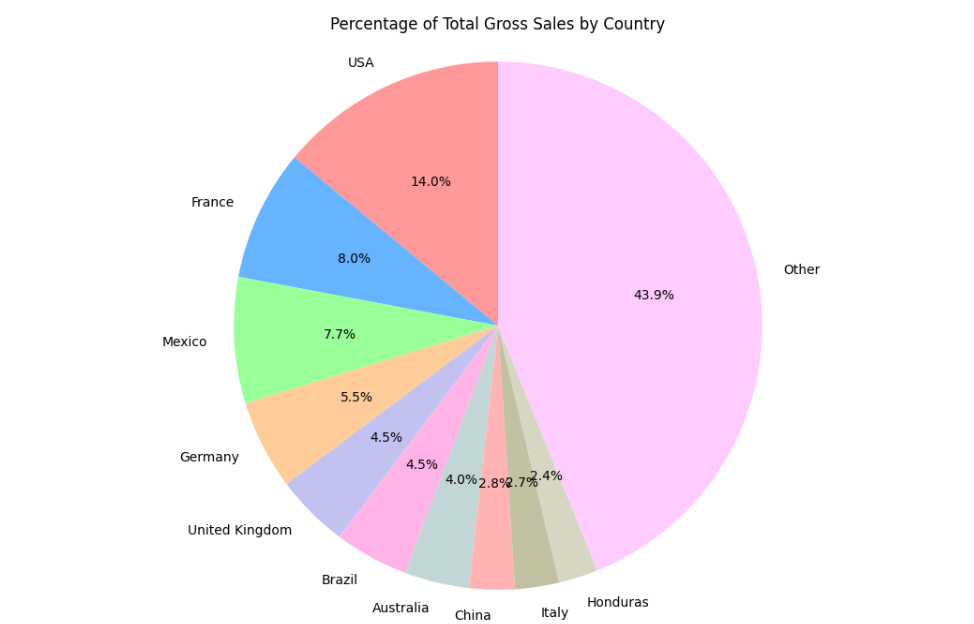

## nlargest ve tolist

In [ ]:
# bir kolondaki istediğimiz sayı kadar ki verileri bir listeye aktarma
top_10_countries = df.nlargest(10, 'Net Country Value')['Customer Country'].tolist()
top_10_countries
# böylelikle en büyük net country değerine sahip ülkelerin listesine ulaşabiliyoruz

## Korelasyon, iloc, Drop, Mapping, Enumerate, Slicing, Concat, Dict (dictionary comprehension), str.replace

In [ ]:

# istediğimiz kolonları seçmek için slicing uyguluyoruz (: bütün satılar, 8:16 (8 den 16 yakadar ki kolonları dahil et))
kor_data_1=data.iloc[:, 8:16]
kor_data_1.drop(' Customer ID ',axis=1)
# ikinci bir veri seti oluşturuyoruz
kor_data_2=data[['Shipment Mode',' Gross Sales ',' Discount % ','Shipment Delay',' Profit ']]
# sonra bunları birleştiriyoruz
merged_data = pd.concat([kor_data_1, kor_data_2], axis=1)
merged_data.drop(' Customer ID ',axis=1,inplace=True)
merged_data.dtypes

In [ ]:
# object veri tipindeki kolonları dönüştürüyoruz
# Columns to apply the transformation
columns_to_transform = ['Product Department','Product Category', 'Product Name', 'Customer Market', 'Customer Region', 'Customer Country', 'Warehouse Country', 'Shipment Mode']

# Unique values for each column
for column in columns_to_transform:
    unique_values = merged_data[column].unique()
    
    # Create a mapping dictionary
    mapping = {value: index+1 for index, value in enumerate(unique_values)}
   
    # Apply the mapping to the column
    merged_data[column] = merged_data[column].map(mapping)

# Normalize the " Discount % " column
merged_data[" Discount % "] = merged_data[" Discount % "].astype(str).str.replace("%", "").str.replace("-", "0").astype(float) / 100

merged_data

## mapping = {value: index+1 for index, value in enumerate(unique_values)}

unique_values: Bu bir liste veya başka bir iterable objedir. Bu kodda, bu liste benzersiz değerlere sahip bir liste olarak kabul edilir.

enumerate(unique_values): Bu ifade, unique_values listesinin her bir elemanını ve onun indeksini döndüren bir iterable nesne oluşturur.

value: index+1: Bu ifade, sözlükteki her bir çiftin "anahtar: değer" yapısını temsil eder. value, unique_values listesindeki bir öğeyi temsil eder ve index+1, bu öğenin indeksine 1 eklenerek elde edilen değeri temsil eder.

{value: index+1 for index, value in enumerate(unique_values)}: Bu sözlük sıkıştırması, unique_values listesindeki her bir öğe için bir çift oluşturur. Her bir öğenin indeksi artırılarak değeri belirlenir ve sözlük oluşturulur.

Sonuç olarak, mapping değişkeni, unique_values listesindeki her bir benzersiz değeri anahtar olarak kullanarak, değerlerini indeksleri artırarak içeren bir sözlüğü temsil eder.

In [ ]:
unique_values = ['kırmızı', 'mavi', 'yeşil', 'sarı']

mapping = {value: index+1 for index, value in enumerate(unique_values)}
print(mapping)

{'kırmızı': 1, 'mavi': 2, 'yeşil': 3, 'sarı': 4}


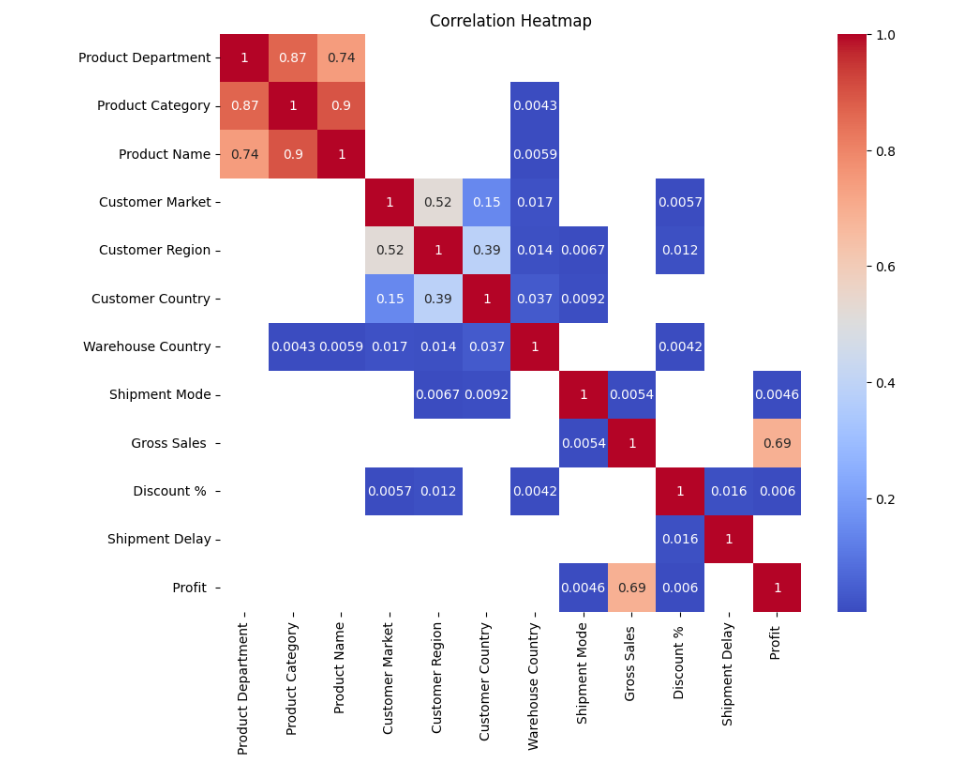

## Birden çok filtreleme yapma

In [ ]:
data_filtered12 = data[(data['Order Date'] < data['Shipment Date']) & (data['Shipment Delay'] <= 7)]

## Bar grafiği oluşturma

Müşteri Bölgelerine göre Müşterilerin ortalama bekleme süresini hesaplama

In [ ]:
import plotly.express as px

central_amerika_siparisler = data_filtered11.groupby('Customer Region')[' Customer ID '].count()
ortalama_bekleme_suresi = data_filtered11.groupby('Customer Region')['Shipment Delay'].mean()

fig = px.bar(ortalama_bekleme_suresi, title="Ortalama Bekleme Süresi by Customer Region")
fig.update_layout(xaxis_title="Customer Region", yaxis_title="Ortalama Bekleme Süresi")
fig.show()

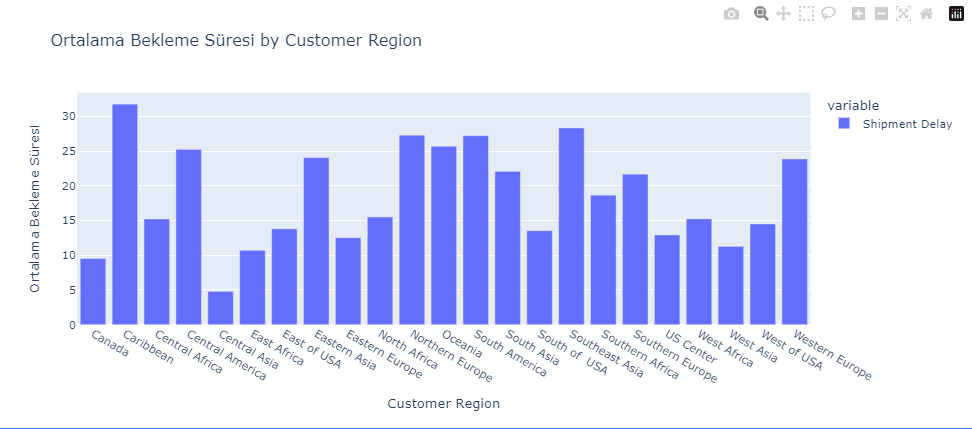

## İsin()

In [ ]:
product_list = ['Field & Stream Sportsman 16 Gun Fire Safe',
                "Diamondback Women's Serene Classic Comfort Bi",
                "Nike Men's Free 5.0+ Running Shoe",
                'Perfect Fitness Perfect Rip Deck',
                'Pelican Sunstream 100 Kayak',
                "Nike Men's Dri-FIT Victory Golf Polo",
                "O'Brien Men's Neoprene Life Vest",
                "Nike Men's CJ Elite 2 TD Football Cleat",
                'Web Camera',
                "Under Armour Girls' Toddler Spine Surge Runni"]

total_gross_sales1 = data_filtered11[data_filtered11['Product Name'].isin(product_list)][' Gross Sales '].sum()
total_gross_sales2= data_filtered11[' Gross Sales '].sum()
total_gross_sales1/total_gross_sales2


## Drop Dublicates

In [ ]:
inner_join_data_monthly_data2merge1.drop_duplicates(subset=['Product Name','Order Month','Order Year'], inplace=True)

## Birleşik Kolonları ayırma ve Numaralandırma Split(), map()

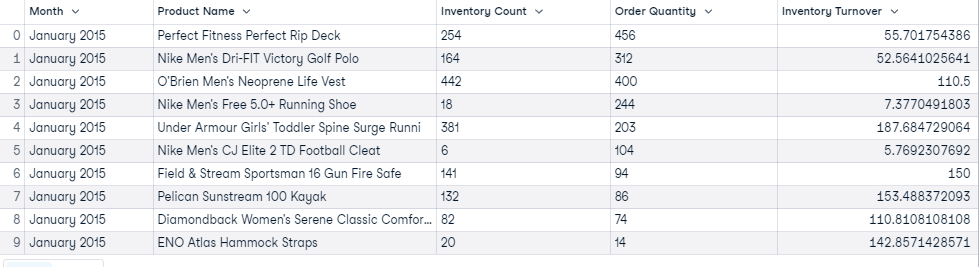

In [ ]:
# Split the "Month" column into "Month" and "Year" columns
data_monthly[['Month', 'Year']] = data_monthly['Month'].str.split(' ', expand=True)
# Define a dictionary to map month names to numbers
month_dict = {'January': '1', 'February': '2', 'March': '3', 'April': '4', 'May': '5', 'June': '6', 'July': '7', 'August': '8', 'September': '9', 'October': '10', 'November': '11', 'December': '12'}

# Apply the mapping to the "Month" column
data_monthly['Month'] = data_monthly['Month'].map(month_dict)

# Show the resulting dataframe
data_monthly

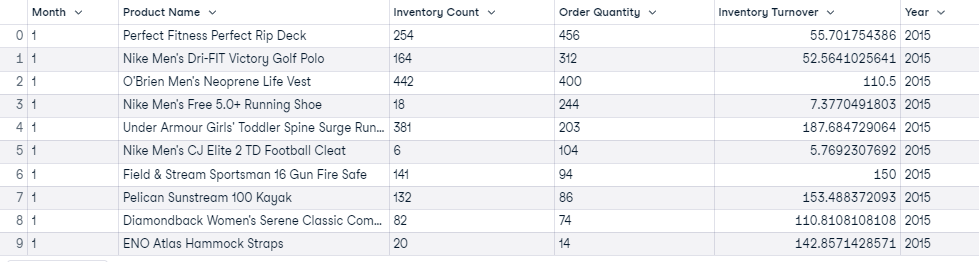

In [ ]:
# ama kolonlar str veri tipinde onları int e çevirmemeiz gererkiyor
# Convert "Month" and "Year" columns to integer type
data_monthly['Month'] = data_monthly['Month'].astype(int)
data_monthly['Year'] = data_monthly['Year'].astype(int)

# Show the resulting dataframe
data_monthly